<a href="https://colab.research.google.com/github/ucinopitasafitri/PRAKTIKUM-MACHINE-LEARNING/blob/main/PERTEMUAN_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum I Machine Learning**

'''
=================================================
Nama  : Uci Nopita Safitri

NPM : F1F022026

Ini adalah program computer vision untuk mengklasifikasi jenis Patah Tulang dari hasil rontgen pasien menggunakan Deep Learning.
=================================================
'''

# Latar Belakang


Dalam dunia analisis data dan pembelajaran mesin (machine learning), kualitas dan keseimbangan data sangat memengaruhi kinerja model prediksi. Salah satu permasalahan umum yang sering muncul adalah ketidakseimbangan data (imbalanced data), yaitu kondisi ketika jumlah sampel antar kelas tidak seimbang. Situasi ini menyebabkan model cenderung lebih mengenali kelas yang jumlahnya dominan dan mengabaikan kelas minoritas, sehingga menghasilkan prediksi yang bias dan tidak akurat (He & Garcia, 2009).

Untuk mengatasi hal tersebut, dilakukan beberapa tahapan penting seperti feature engineering dan data balancing. Feature engineering membantu meningkatkan representasi data agar model lebih mudah mengenali pola yang relevan (Zheng & Casari, 2018), sementara data balancing seperti teknik oversampling dan undersampling digunakan untuk menyeimbangkan distribusi kelas agar model dapat belajar secara adil terhadap semua kategori (Chawla et al., 2002).

Mempelajari hal ini penting karena dengan memahami pengaruh feature engineering dan data balancing terhadap performa model — seperti yang diuji menggunakan Logistic Regression — kita dapat menghasilkan model prediksi yang lebih akurat, adil, dan andal dalam pengambilan keputusan, terutama pada kasus nyata seperti klasifikasi cuaca, penyakit, atau deteksi risiko yang memiliki data tidak seimbang (Fernández et al., 2018).

# Tujuan Penelitian






1.   Mahasiswa memahami konsep dari berbagai jenis
2.   feature engineering pada Python.
Mahasiswa dapat melakukan teknik feature engineering di program Python.


# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [21]:
!pip install feature_engine

In [22]:
# Define Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Encoding
from sklearn.preprocessing import OneHotEncoder

#Handling Outlier
from feature_engine.outliers import Winsorizer

#Balancing Data
from imblearn.over_sampling import SMOTE

#model ML
from sklearn.linear_model import LogisticRegression

#model performence
from sklearn.metrics import classification_report, f1_score

# Memuat Data

# Analisis Data Eksploratif

In [73]:
print(df_imp4.describe())

            Hujan  Suhu Udara  Kelembapan  Kecepatan Angin
count  743.000000  743.000000  743.000000       743.000000
mean     1.779273   26.540915   83.881561         6.655012
std      0.415016    2.557152   11.561250         2.546321
min      1.000000   22.600000   52.000000         2.000000
25%      2.000000   24.300000   75.000000         5.000000
50%      2.000000   26.000000   86.000000         6.655012
75%      2.000000   28.900000   94.000000         7.000000
max      2.000000   32.000000  100.000000        21.000000


Sebelum kita membahas lebih jauh tentang Feature Engineering, berikut ini adalah beberapa dataset yang akan digunakan untuk memperjelas tujuan dari notebook ini.

In [25]:
# Load penelitian Dataset

df_ori = pd.read_csv('https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data_penelitian.csv', sep=';')
data_pt1 = df_ori.copy()
data_pt1.head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
0,1,23.0,95,5.0,NaN
1,1,24.0,90,1.0,NaN
2,1,26.8,77,1.0,NaN
3,1,29.6,62,2.0,2.0
4,1,30.8,56,1.0,7.0
5,1,31.0,55,1.0,7.0
6,1,30.4,57,3.0,9.0
7,2,30.9,58,2.0,10.0
8,2,30.2,62,2.0,8.0
9,2,29.7,62,2.0,7.0


In [26]:
# Melihat dimensi data
data_pt1.shape

(743, 5)

In [27]:
#melihat tipe data
data_pt1.dtypes

,0
Hujan,int64
Suhu Udara,float64
Kelembapan,int64
Keadaan Cuaca,float64
Kecepatan Angin,float64


# _Feature Engineering_

## A - Missing Value

Data hilang (***missing data***) atau nilai hilang (***missing values***) terjadi ketika tidak ada data atau nilai yang tersimpan untuk suatu observasi pada variabel tertentu.

Kehilangan data adalah hal yang sering terjadi, baik dalam kompetisi data science maupun di dunia bisnis, dan dapat mempengaruhi kesimpulan yang diambil dari data tersebut. **Data yang tidak lengkap merupakan masalah yang tidak bisa dihindari saat bekerja dengan berbagai sumber data.**

---
### - Kenapa data hilang (data missing)?

Ada berbagai alasan mengapa data bisa hilang, antara lain:
* Nilai bisa **hilang** atau **tidak tersimpan dengan benar** saat proses pengumpulan data.
  
  Misalnya, data berasal dari survei yang diisi secara manual ke dalam formulir online. Petugas entri data bisa saja lupa mengisi satu kolom dalam formulir tersebut, sehingga nilai pada kolom itu menjadi hilang.

* **Nilai memang tidak ada.**

  Contohnya: untuk variabel yang dihitung dari hasil pembagian antara dua variabel, seperti rasio utang terhadap pendapatan. Jika seseorang tidak memiliki pendapatan, maka nilai rasio tersebut tidak dapat dihitung karena pembagian dengan nol tidak terdefinisi.


* Data hilang juga bisa terjadi karena **responden menolak menjawab** pertanyaan tertentu dalam formulir.
  
  Misalnya, seseorang mungkin enggan mengungkapkan jumlah pendapatannya. Akibatnya, nilai untuk variabel “pendapatan” akan menjadi hilang bagi orang tersebut.

Selain memahami penyebab hilangnya data, **penting juga untuk memahami mekanisme bagaimana nilai-nilai yang hilang itu muncul dalam dataset**.
Tergantung pada mekanismenya, kita bisa memilih untuk memproses nilai yang hilang dengan cara yang berbeda. Selain itu, dengan mengetahui sumber data yang hilang, kita juga bisa mengambil langkah untuk mengendalikan sumber tersebut, dan mengurangi jumlah data yang hilang di masa depan selama proses pengumpulan data.

In [29]:
# Check Missing Values

data_pt1.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,9
Kecepatan Angin,314


In [30]:
# Check Missing Values as Percentage to Total Data

data_pt1.isnull().mean()

,0
Hujan,0.000000
Suhu Udara,0.000000
Kelembapan,0.000000
Keadaan Cuaca,0.012113
Kecepatan Angin,0.422611


In [31]:
#Missing value kolom Keadaan Cuaca
data_pt1[data_pt1['Keadaan Cuaca'].isnull()].head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
41,2,26.0,92,NaN,NaN
206,1,23.8,98,NaN,5.0
309,1,23.3,97,NaN,NaN
511,2,28.8,79,NaN,12.0
597,2,24.6,92,NaN,NaN
638,1,22.8,98,NaN,4.0
674,2,25.5,96,NaN,NaN
722,2,27.0,80,NaN,4.0
724,2,31.0,57,NaN,6.0


### Penanganan Data Missing

#### -Imputasi Missing Data

imputasi yang digunakan adalah imputasi median untuk keadaan cuaca dan imputasi mean untuk kecepatan angin
note : banyak imputasi lain yang dapat dicobakan

In [45]:
# Duplikasi data asli
df_imp4 = df_ori.copy()

# Isi NaN dengan median
median_value = df_imp4['Keadaan Cuaca'].median()
df_imp4['Keadaan Cuaca'] = df_imp4['Keadaan Cuaca'].fillna(median_value)
df_imp4.isnull().sum()


# Isi NaN dengan mean
mean_value = df_imp4['Kecepatan Angin'].mean()
df_imp4['Kecepatan Angin'] = df_imp4['Kecepatan Angin'].fillna(mean_value)
df_imp4.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,0
Kecepatan Angin,0


## B - Kardinalitas

Fungsi kardinalitas adalah untuk mengukur dan memahami jumlah variasi atau hubungan dalam suatu data atau himpunan. Dalam analisis data, kardinalitas membantu mengetahui seberapa banyak nilai unik dalam sebuah variabel, sehingga berguna untuk menentukan jenis pengolahan atau metode analisis yang sesuai. Misalnya, variabel dengan kardinalitas tinggi seperti “ID Pelanggan” biasanya tidak digunakan dalam analisis statistik karena tidak memiliki pola berulang, sedangkan variabel dengan kardinalitas rendah seperti “Jenis Kelamin” atau “Status Pernikahan” lebih relevan untuk analisis kategorik. Dalam basis data, fungsi kardinalitas adalah untuk menentukan jenis hubungan antar tabel, seperti satu ke satu (1:1), satu ke banyak (1:N), atau banyak ke banyak (M:N), agar struktur data dapat diatur secara efisien dan konsisten.

In [46]:
df_imp4.head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
0,1,23.0,95,5.0,6.655012
1,1,24.0,90,1.0,6.655012
2,1,26.8,77,1.0,6.655012
3,1,29.6,62,2.0,2.000000
4,1,30.8,56,1.0,7.000000
5,1,31.0,55,1.0,7.000000
6,1,30.4,57,3.0,9.000000
7,2,30.9,58,2.0,10.000000
8,2,30.2,62,2.0,8.000000
9,2,29.7,62,2.0,7.000000


In [40]:
df_imp4['Keadaan Cuaca'].unique()

array([ 5.,  1.,  2.,  3., nan, 14., 60., 61., 21., 29., 10., 16., 62.,
       63., 65., 15., 17., 13., 95., 91., 97.])

In [47]:
#Mengurangi Kardinalitas

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
### 2. Tentukan Label untuk Setiap Bin
# 10 label (0 s/d 9)
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### 3. Terapkan pd.cut
df_imp4['Keadaan_Cuaca_reduced'] = pd.cut(
    df_imp4['Keadaan Cuaca'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

### 4. Verifikasi
print("--- Hasil Perbandingan ---")
# Menampilkan 10 data acak untuk melihat perubahannya
print(df_imp4.sample(10))

print("\n--- Pengecekan Kardinalitas ---")
print('Jumlah kategori di "Keadaan Cuaca" asli : {}'.format(len(df_imp4['Keadaan Cuaca'].unique())))
print('Jumlah kategori di "Keadaan_Cuaca_reduced" : {}'.format(len(df_imp4['Keadaan_Cuaca_reduced'].unique())))

print("\nKategori unik yang baru (reduced):")
print(df_imp4['Keadaan_Cuaca_reduced'].unique())

--- Hasil Perbandingan ---
     Hujan  Suhu Udara  Kelembapan  Keadaan Cuaca  Kecepatan Angin  \
378      2        26.2          90            2.0         6.655012   
512      1        23.6          95           95.0         7.000000   
316      2        29.0          77            1.0         9.000000   
167      2        23.2          97           21.0         6.655012   
29       2        31.3          59            2.0        10.000000   
421      2        28.3          81            3.0         2.000000   
150      2        30.6          67            2.0        14.000000   
608      2        28.2          81            3.0         9.000000   
74       2        26.7          83            1.0         7.000000   
642      1        23.8          97           13.0         6.655012   

    Keadaan_Cuaca_reduced  
378                     0  
512                     9  
316                     0  
167                     2  
29                      0  
421                     0  
150   

Kode tersebut berfungsi untuk mengurangi kardinalitas pada kolom “Keadaan Cuaca” dengan cara mengelompokkan nilai-nilai numerik ke dalam interval (bins). Proses ini dilakukan menggunakan fungsi pd.cut(), yang membagi data menjadi beberapa kategori agar jumlah nilai unik berkurang. Tujuannya adalah menyederhanakan data sehingga lebih mudah dianalisis dan diolah dalam model statistik atau machine learning.

## C- Splitting Data

Splitting Data membagi data menjadi data latih dan data uji dengan proporsi 90% untuk pelatihan dan 10% untuk pengujian. Parameter stratify=y memastikan distribusi kelas target tetap seimbang, sedangkan random_state=200 menjaga hasil pembagian agar konsisten. Perintah X_test.shape menampilkan ukuran (jumlah baris dan kolom) data uji yang dihasilkan.

In [48]:
#mendeskripsikan variabel X dan y
df_imp4=df_imp4.drop('Keadaan Cuaca', axis = 1)
X= df_imp4.drop('Hujan', axis = 1)
y=df_imp4['Hujan']

In [49]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.1,random_state=200, stratify=y)
X_test.shape

(75, 4)

## D- Handling Outlier

Handling outlier adalah proses untuk mengidentifikasi dan menangani data yang nilainya jauh berbeda (ekstrem) dari sebagian besar data lainnya. Tujuannya agar hasil analisis tidak bias akibat nilai yang terlalu tinggi atau rendah.

In [50]:
#buat list fitur numerik
list_num = ['Suhu Udara', 'Kelembapan', 'Kecepatan Angin']
# Hitung IQR
list_outlier=[]
list_lower_bound =[]
list_upper_bound =[]
for i in X_train[list_num]:
    Q1 = np.percentile(X_train[i], 25)
    Q3 = np.percentile(X_train[i], 75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    list_lower_bound.append(lower_bound)
    list_upper_bound.append(upper_bound)

    # Hitung jumlah outlier di bawah batas bawah dan di atas batas atas
    num_outliers_lower = np.sum(X_train[i] < lower_bound)
    num_outliers_upper = np.sum(X_train[i] > upper_bound)

    # Jumlah total outlier
    total_outliers = num_outliers_lower + num_outliers_upper
    list_outlier.append(total_outliers)

#Mendefinikan dataframe baru mengenai outliers
outliers = pd.DataFrame()
outliers['Kolom'] = list_num
outliers['Jumlah Outlier'] = list_outlier
outliers['Lower Bound'] = list_lower_bound
outliers['Upper Bound'] = list_upper_bound
outliers

,Kolom,Jumlah Outlier,Lower Bound,Upper Bound
0,Suhu Udara,0,17.3375,35.8375
1,Kelembapan,0,46.5000,122.5000
2,Kecepatan Angin,225,4.5000,8.5000


Dari hasil analisa diketahui bahwa 1 kolom fitur memiliki outlier pada data dengan jumlah yang besar.

In [51]:
#mendefinisikan kolom yang digunakan dan list tempat value skewness
df_num = X_train[list_num]
nilai_skew = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df_num.columns:
    skewness = X_train[i].skew()
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness sedang: ['Kelembapan', 'Kecepatan Angin']
kolom yang mempunyai nilai skewness normal: ['Suhu Udara']


Setelah dilihat sebaran datanya, diketahui bahwa kolom fitur kecepatan angin berdistribusi skew

#### Capping

Capping adalah metode penanganan outlier dengan cara membatasi (menyamakan) nilai ekstrem agar tidak melebihi batas tertentu, tanpa menghapus data. Tujuannya agar nilai outlier tetap dipertahankan tetapi tidak terlalu memengaruhi hasil analisis.

In [53]:
# Capping the skew distribution

winsoriser_Kecepatan_Angin = Winsorizer(capping_method='iqr', #gaussian for normal distribution
                            tail='both',
                            fold=1.5,
                            variables=['Kecepatan Angin'],
                            missing_values='ignore')

X_train_capped = winsoriser_Kecepatan_Angin.fit_transform(X_train)
X_test_capped = winsoriser_Kecepatan_Angin.transform(X_test)

print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_capped.shape)

Size dataset - Before trimming :  (668, 4)
Size dataset - After trimming  :  (668, 4)


#### visualisasi

In [54]:
#Defining a function to create histogram and box plot for certain variables
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, color='teal')
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable], color='teal')
    plt.title('Boxplot')

    plt.show()

Suhu Udara - Before Capping


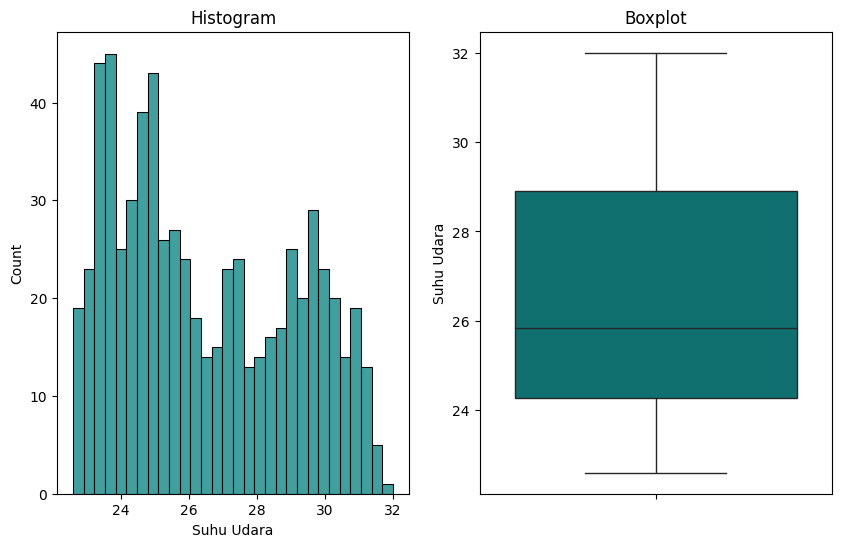


Suhu Udara - After Capping


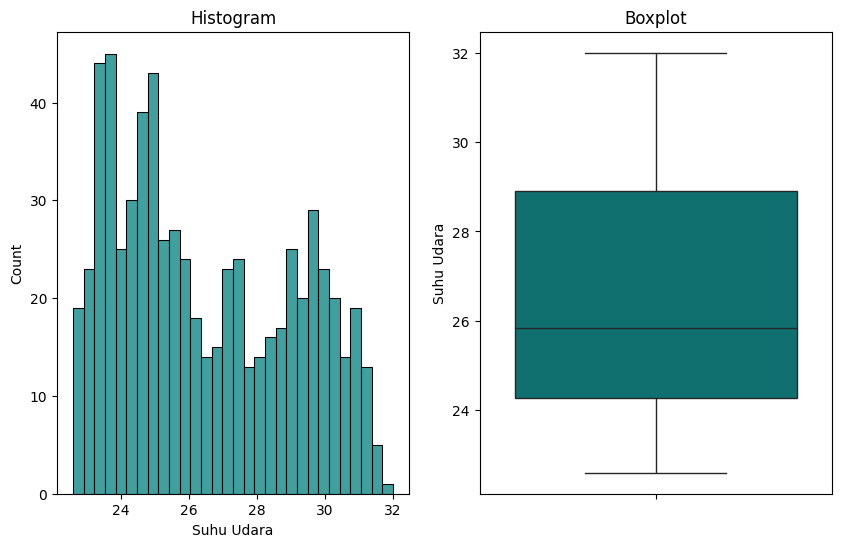

Kelembapan - Before Capping


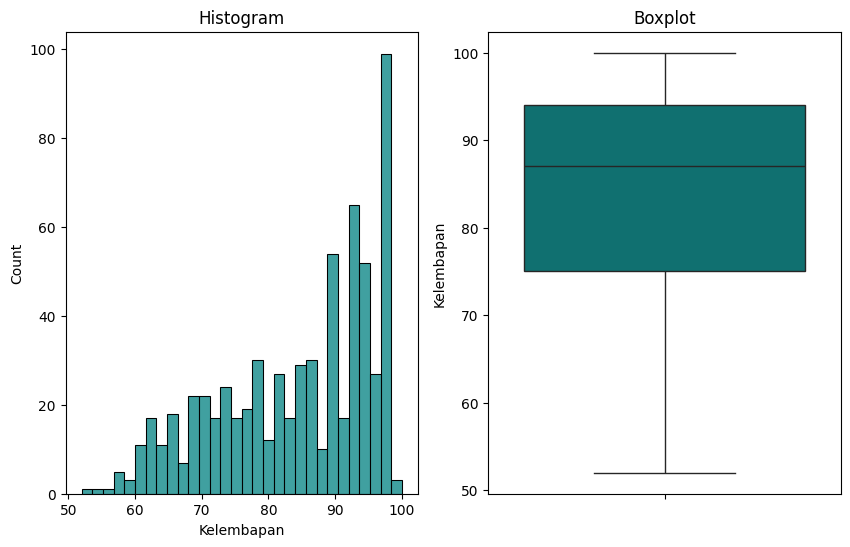


Kelembapan - After Capping


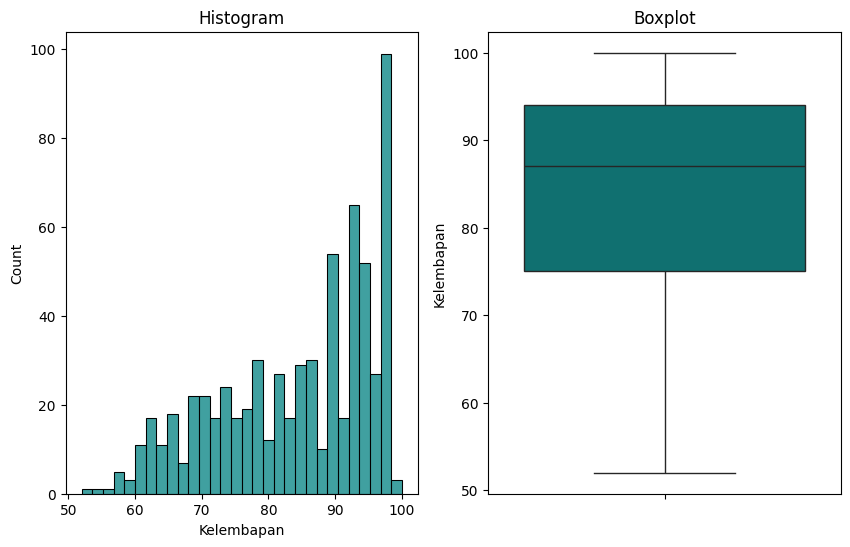

Kecepatan Angin - Before Capping


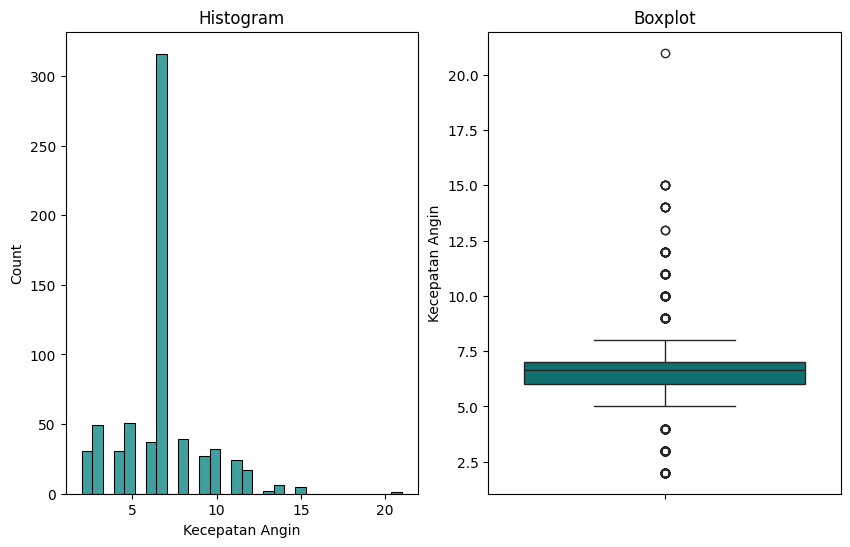


Kecepatan Angin - After Capping


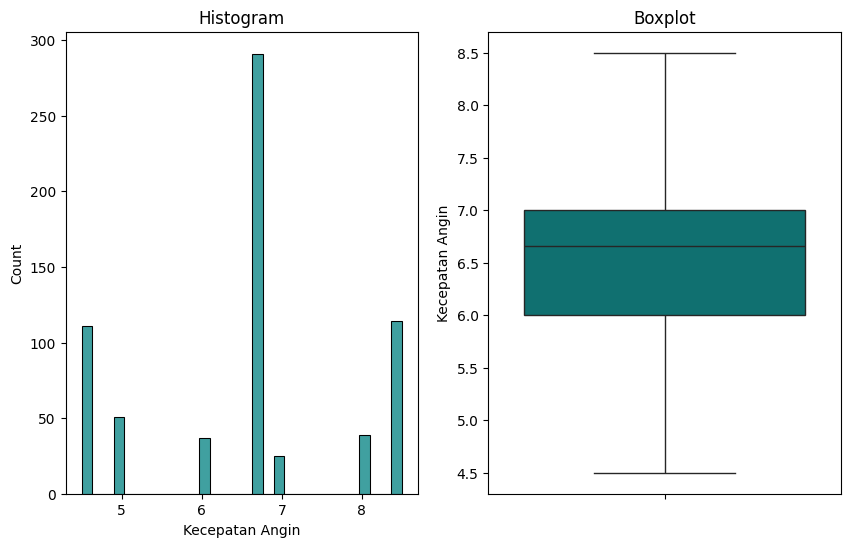

In [55]:
# Plotting histogram and boxplot before and after capping
for col in list_num:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)


## E- Scaling

Scaling adalah proses menstandarkan atau menormalkan skala nilai pada data numerik agar semua variabel berada pada rentang yang sebanding.

In [56]:
#mendefinisikan kolom yang digunakan dan list tempat value skewness
nilai_skew = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df_num.columns:
    skewness = X_train_capped[i].skew()
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness sedang: ['Kelembapan']
kolom yang mempunyai nilai skewness normal: ['Suhu Udara', 'Kecepatan Angin']


In [57]:
#melakukan scalling menggunakan standard scaller
standard_scaler = StandardScaler()
standard_scaler.fit(X_train_capped[nilai_skew_normal])
X_train_capped[nilai_skew_normal] = standard_scaler.transform(X_train_capped[nilai_skew_normal])
X_test_capped[nilai_skew_normal] = standard_scaler.transform(X_test_capped[nilai_skew_normal])

In [58]:
#melakukan scalling menggunakan robust scaller
robust_scaler = RobustScaler()
robust_scaler.fit(X_train_capped[nilai_skew])
X_train_capped[nilai_skew] = robust_scaler.transform(X_train_capped[nilai_skew])
X_test_capped[nilai_skew] = robust_scaler.transform(X_test_capped[nilai_skew])

In [59]:
X_train_scale = X_train_capped
X_test_scale = X_test_capped

## F- Encoding

### One Hot Encoder

In [72]:
list_cat = ['Keadaan_Cuaca_reduced']

encoder = OneHotEncoder()

#melakukan encoding
X_train_encoded = encoder.fit_transform(X_train_scale[list_cat])
X_test_encoded = encoder.transform(X_test_scale[list_cat])

Kode tersebut digunakan untuk melakukan One-Hot Encoding pada kolom kategorik “Keadaan_Cuaca_reduced” agar dapat diproses oleh model machine learning. Proses ini mengubah setiap kategori menjadi bentuk biner (0 dan 1). Fungsi fit_transform() digunakan pada data latih untuk mempelajari dan mengonversi kategori, sedangkan transform() diterapkan pada data uji menggunakan pola yang sama agar konsisten. Hasilnya, setiap kategori dalam kolom tersebut diubah menjadi beberapa kolom baru yang merepresentasikan keberadaan tiap kategori dengan nilai 0 atau 1.

## G- Balancing Data

Balancing data adalah proses menyeimbangkan jumlah data antara kelas yang tidak seimbang pada dataset klasifikasi. Tujuannya agar model machine learning tidak bias terhadap kelas dengan jumlah data lebih besar dan dapat mengenali kelas minoritas dengan baik. Teknik yang umum digunakan meliputi oversampling, yaitu menambah data pada kelas minoritas (misalnya dengan metode SMOTE), serta undersampling, yaitu mengurangi data pada kelas mayoritas. Dengan melakukan balancing, distribusi data menjadi lebih proporsional sehingga model dapat menghasilkan prediksi yang lebih akurat dan adil.

In [62]:
y_train.value_counts()

,count
Hujan,
2,521
1,147


In [63]:
# Oversampling with SMOTE

smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)     # Minority Class will have same the same number as the majority class
# smote = SMOTE(sampling_strategy={1:1000}, k_neighbors=5, random_state=42)     # Minority Class will have 1000 data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)
y_train_balanced.value_counts()

,count
Hujan,
2,521
1,521


# _Training Model_

In [64]:
#tanpa feature engineering
lr_1 = LogisticRegression()
lr_1.fit(X_train, y_train)

LogisticRegression()

In [65]:
#dengan feature engineering
lr_2 = LogisticRegression()
lr_2.fit(X_train_encoded, y_train)

LogisticRegression()

In [66]:
#dengan feature engineering dan balancing data
lr_3 = LogisticRegression()
lr_3.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

# _Model Performance_

In [67]:
# Check Results - without Handling

print(classification_report(y_train, lr_1.predict(X_train)))
print(classification_report(y_test, lr_1.predict(X_test)))

              precision    recall  f1-score   support

           1       0.53      0.12      0.20       147
           2       0.80      0.97      0.87       521

    accuracy                           0.78       668
   macro avg       0.66      0.55      0.54       668
weighted avg       0.74      0.78      0.73       668

              precision    recall  f1-score   support

           1       1.00      0.18      0.30        17
           2       0.81      1.00      0.89        58

    accuracy                           0.81        75
   macro avg       0.90      0.59      0.60        75
weighted avg       0.85      0.81      0.76        75



In [69]:
# Check Results - with Handling

print(classification_report(y_train, lr_2.predict(X_train_encoded)))
print(classification_report(y_test, lr_2.predict(X_test_encoded)))

              precision    recall  f1-score   support

           1       0.56      0.24      0.34       147
           2       0.82      0.95      0.88       521

    accuracy                           0.79       668
   macro avg       0.69      0.60      0.61       668
weighted avg       0.76      0.79      0.76       668

              precision    recall  f1-score   support

           1       0.80      0.24      0.36        17
           2       0.81      0.98      0.89        58

    accuracy                           0.81        75
   macro avg       0.81      0.61      0.63        75
weighted avg       0.81      0.81      0.77        75



In [68]:
# Check Results - with Handling

print(classification_report(y_train_balanced, lr_3.predict(X_train_balanced)))
print(classification_report(y_test, lr_3.predict(X_test_encoded)))

              precision    recall  f1-score   support

           1       0.78      0.39      0.52       521
           2       0.59      0.89      0.71       521

    accuracy                           0.64      1042
   macro avg       0.69      0.64      0.61      1042
weighted avg       0.69      0.64      0.61      1042

              precision    recall  f1-score   support

           1       0.70      0.41      0.52        17
           2       0.85      0.95      0.89        58

    accuracy                           0.83        75
   macro avg       0.77      0.68      0.71        75
weighted avg       0.81      0.83      0.81        75



**interpretasi:**

**1. Tanpa Handling (lr_1)**

Akurasi: ±78% pada data train, ±81% pada data test.

Recall untuk kelas minoritas (1): sangat rendah (0.12–0.18), artinya model sulit mengenali kelas minoritas.

Recall kelas mayoritas (2): sangat tinggi (0.97–1.00).

Interpretasi: Model cenderung bias terhadap kelas mayoritas, sehingga prediksi tidak seimbang. Masalah ini biasanya muncul akibat imbalanced data (jumlah data antar kelas tidak seimbang).

**2. Dengan Feature Engineering (lr_2)**

Akurasi: tetap sekitar 79–81%.

Recall kelas 1: sedikit meningkat (0.24), menunjukkan model mulai belajar mengenali kelas minoritas.

F1-score kelas 1: naik dari 0.20 → 0.34 (train) dan 0.30 → 0.36 (test).

Interpretasi: Setelah dilakukan feature engineering (seperti encoding dan scaling), performa model meningkat terutama dalam mengenali kelas minoritas, meskipun belum signifikan. Model lebih seimbang, tapi masih cenderung berpihak pada kelas mayoritas.

**3. Dengan Feature Engineering + Balancing Data (lr_3)**

Akurasi: sedikit turun menjadi ±64% (train) tetapi stabil di ±83% (test).

Recall kelas 1: naik menjadi 0.39 (train) dan 0.41 (test), jauh lebih baik dibanding model sebelumnya.

Precision dan F1-score kelas 1: juga meningkat secara konsisten.

Interpretasi: Setelah balancing data ( dengan SMOTE), model menjadi lebih adil dalam mengenali kedua kelas. Meskipun akurasi keseluruhan sedikit menurun, keseimbangan antar kelas (macro avg recall & f1) meningkat signifikan. Ini menunjukkan model menjadi lebih general dan tidak bias terhadap kelas mayoritas.

# Kesimpulan

**Kesimpulan:**
Dari ketiga model yang diuji, terlihat bahwa penerapan *feature engineering* dan *data balancing* memberikan pengaruh positif terhadap kinerja model **Logistic Regression**.

Model tanpa penanganan (*lr_1*) menunjukkan hasil akurasi tinggi namun sangat bias terhadap kelas mayoritas. Setelah dilakukan *feature engineering* (*lr_2*), kemampuan model dalam mengenali kelas minoritas mulai meningkat meskipun belum optimal. Model terbaik diperoleh setelah dilakukan *feature engineering* dan *balancing data* (*lr_3*), di mana nilai **recall dan f1-score untuk kelas minoritas meningkat signifikan** dan model menjadi lebih seimbang dalam melakukan prediksi kedua kelas.

Dengan demikian, **proses feature engineering dan balancing data terbukti efektif dalam memperbaiki kinerja model pada data yang tidak seimbang**.

# Referensi

Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research, 16, 321–357.

Fernández, A., García, S., Galar, M., Prati, R. C., Krawczyk, B., & Herrera, F. (2018). Learning from Imbalanced Data Sets. Springer.

He, H., & Garcia, E. A. (2009). Learning from Imbalanced Data. IEEE Transactions on Knowledge and Data Engineering, 21(9), 1263–1284.

Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. O’Reilly Media.